<a href="https://colab.research.google.com/github/MJanbandhu/UnSupervised-/blob/main/KMeans_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem statement: With the iris dataset we need to
## cluster iris flowers into certain groups.

In [ ]:
#load the libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#load the data
data = pd.read_csv('Iris.csv')

In [ ]:
data

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,target
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,2
146,146,6.3,2.5,5.0,1.9,2
147,147,6.5,3.0,5.2,2.0,2
148,148,6.2,3.4,5.4,2.3,2


In [ ]:
#	Unnamed: 0 drop
data.drop('Unnamed: 0',axis=1,inplace = True)

In [ ]:
data

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
#basic checks
data.shape

(150, 5)

In [ ]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'], dtype='object')

In [ ]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [ ]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
target            int64
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
data['target'].unique()

array([0, 1, 2], dtype=int64)

In [ ]:
data['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

EDA

Task

Preprocessing

In [ ]:
#null values
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

In [ ]:
#duplicates
data.duplicated().sum()

3

In [ ]:
#drop the duplicates
data1 = data.drop_duplicates()

In [ ]:
data1

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
data1.shape

(147, 5)

In [ ]:
data1.duplicated().sum()

0

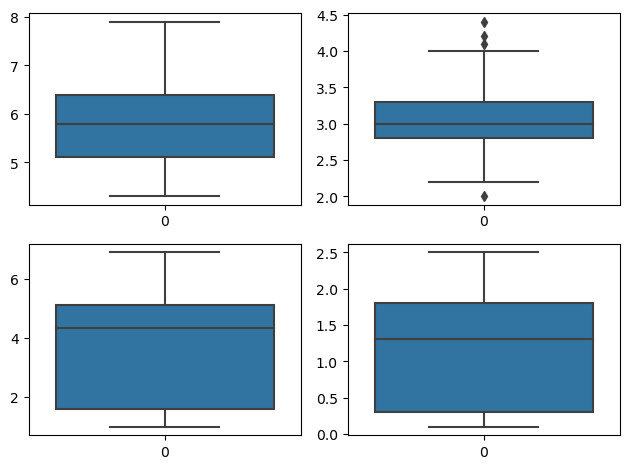

In [ ]:
#outliers
i = 1
for col in data1:
  if i <= 4:
    ax = plt.subplot(2,2,i)
    sns.boxplot(data[col])
  i+=1
plt.tight_layout()


In [ ]:
# sepal_width has outliers
# we need to handle
# check distribution

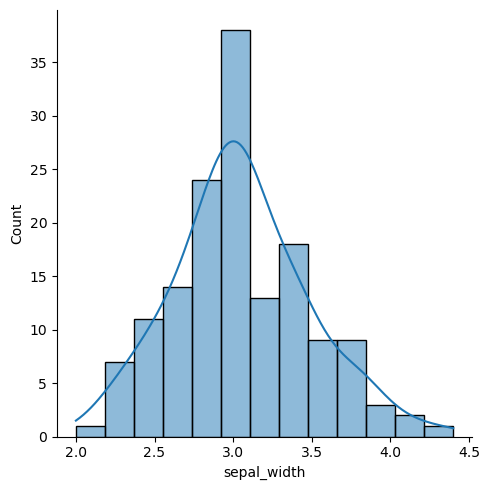

In [ ]:
sns.displot(x=data['sepal_width'],kde=True)

In [ ]:

# 3 sigma rule
# lower = mean(u) - 3 sigma           # lower boundary q1-1.5*IQR
# upper = mean(u) + 3sigma            # upper boundary q3 +1.5*IQR

In [ ]:
lower = data1['sepal_width'].mean() - 3 * data1['sepal_width'].std()
lower

1.7791024879488937

In [ ]:
upper = data1['sepal_width'].mean() + 3 * data1['sepal_width'].std()
upper

4.314173461886822

In [ ]:
#find the values less than lower limit
data1.loc[data1['sepal_width']<lower]

,sepal_length,sepal_width,petal_length,petal_width,target


In [ ]:
#find the values greater than upper limit
data1.loc[data1['sepal_width']>upper]

,sepal_length,sepal_width,petal_length,petal_width,target
15,5.7,4.4,1.5,0.4,0


In [ ]:
# replace the outlier with mean
data1.loc[data1['sepal_width']>upper,'sepal_width'] = data1['sepal_width'].mean()

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()                              # z = x-u/sigma
                                                 # minmax scaler = x-min/(max-min)


In [ ]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'], dtype='object')

In [ ]:
data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width', ]] = \
sc.fit_transform(data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

In [ ]:
data

,sepal_length,sepal_width,petal_length,petal_width,target
0,-0.900681,1.032057,-1.341272,-1.312977,0
1,-1.143017,-0.124958,-1.341272,-1.312977,0
2,-1.385353,0.337848,-1.398138,-1.312977,0
3,-1.506521,0.106445,-1.284407,-1.312977,0
4,-1.021849,1.263460,-1.341272,-1.312977,0
...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,2
146,0.553333,-1.281972,0.705893,0.922064,2
147,0.795669,-0.124958,0.819624,1.053537,2
148,0.432165,0.800654,0.933356,1.447956,2


<Axes: xlabel='petal_length', ylabel='petal_width'>

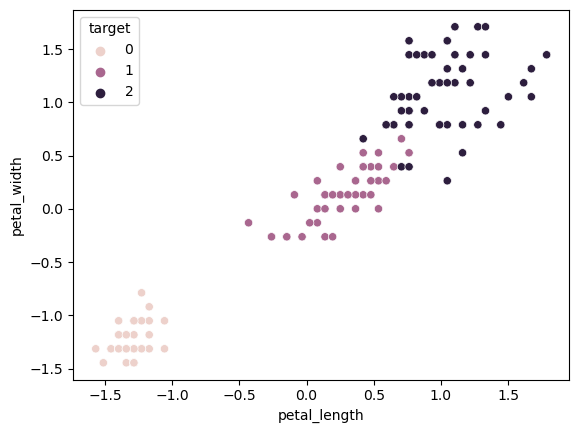

In [ ]:
sns.scatterplot(x=data['petal_length'],y=data['petal_width'],hue=data['target'])

In [ ]:
#since it is unsupervised learning, we are gping to drop the target
data.drop(columns=['target'],axis=1,inplace=True)

Model building

target is not there, no train test split

entire data is x

In [ ]:
x = data

In [ ]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [ ]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3,random_state= 10 )   # k=3
model.fit(x)

KMeans(n_clusters=3, random_state=10)

In [ ]:
#centroids
model.cluster_centers_

array([[-1.01457897,  0.84230679, -1.30487835, -1.25512862],
       [-0.01139555, -0.87288504,  0.37688422,  0.31165355],
       [ 1.16743407,  0.15377779,  1.00314548,  1.02963256]])

In [ ]:
# get the custer labels
model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

<Axes: xlabel='petal_length', ylabel='petal_width'>

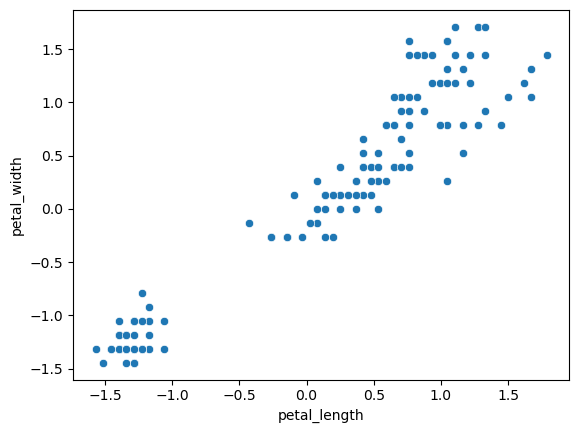

In [ ]:
c = np.array(['red','green','blue','black'])
sns.scatterplot(x=data['petal_length'],y=data['petal_width'])

In [ ]:
data

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [ ]:
data['lables'] = pd.DataFrame(model.labels_)   # appending labels in data

In [ ]:
data

,sepal_length,sepal_width,petal_length,petal_width,lables
0,-0.900681,1.032057,-1.341272,-1.312977,0
1,-1.143017,-0.124958,-1.341272,-1.312977,0
2,-1.385353,0.337848,-1.398138,-1.312977,0
3,-1.506521,0.106445,-1.284407,-1.312977,0
4,-1.021849,1.263460,-1.341272,-1.312977,0
...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,2
146,0.553333,-1.281972,0.705893,0.922064,1
147,0.795669,-0.124958,0.819624,1.053537,2
148,0.432165,0.800654,0.933356,1.447956,2


In [ ]:
#evaluate the model
from sklearn.metrics import silhouette_score
silhouette_score(x,model.labels_)

0.5213630634020665

<Axes: xlabel='petal_length', ylabel='petal_width'>

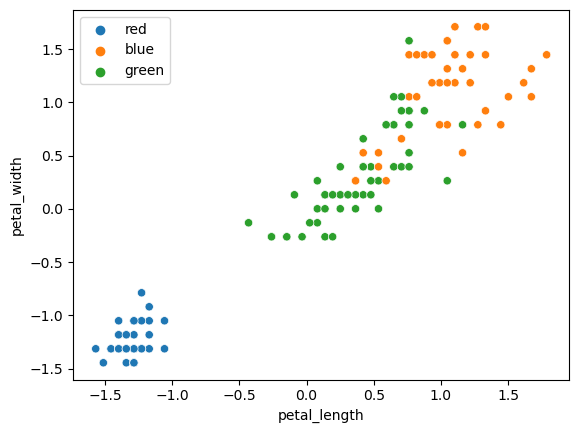

In [ ]:
color = np.array(['red','green','blue','orange','black'])
sns.scatterplot(x= data.petal_length, y = data.petal_width, hue=color[model.labels_])

In [ ]:
#we are having overlapping of datapounts in all the cluters

#its because we have opted for a wrong K value



ELBOW METHOD

Text(0, 0.5, 'WCSS')

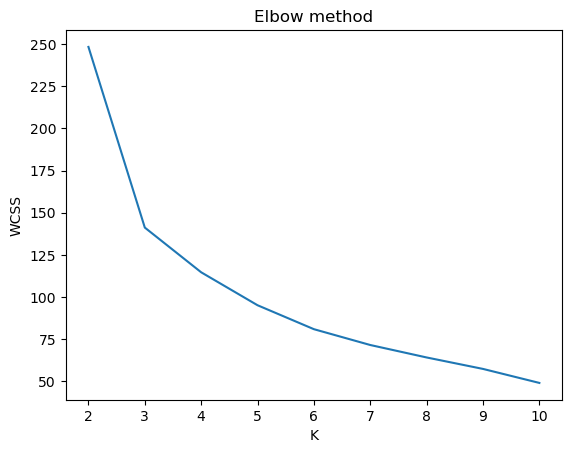

In [ ]:
WCSS = []

for k in range (2,11):
  model = KMeans(n_clusters = k,random_state = 20)
  model.fit(x)
  WCSS.append(model.inertia_)
plt.plot(range(2,11),WCSS)
plt.title('Elbow method')
plt.xlabel('K')
plt.ylabel('WCSS')

In [ ]:
WCSS

[248.37200573676347,
 141.15417813388652,
 114.61550694959809,
 95.0610384365927,
 80.84995680044223,
 71.45994543516206,
 64.06714553425472,
 57.26914317293365,
 48.95762370318144]

In [ ]:
#from the graph we get K = 3
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3,random_state=42 )
model.fit(x)

KMeans(n_clusters=3, random_state=42)

In [ ]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [ ]:
silhouette_score(x,model.labels_)

0.5213630634020665

In [ ]:
model.cluster_centers_

array([[ 5.04866127e-02, -4.02641159e-01,  3.02146441e-01,
         1.59520537e-01,  1.00000000e+00],
       [ 9.03373790e-01,  1.83579686e-01,  1.00285828e+00,
         1.37491510e+00,  2.00000000e+00],
       [-9.67323499e-01,  8.70075149e-01, -1.30430970e+00,
        -1.22094565e+00, -5.55111512e-16],
       [ 3.10997534e-01, -7.54887895e-01,  7.40644202e-01,
         7.83286739e-01,  1.00000000e+00],
       [-5.74459981e-01,  1.97546931e+00, -1.27128385e+00,
        -1.20173037e+00, -4.44089210e-16],
       [-4.02546592e-01, -1.51337539e+00,  9.61662239e-02,
         9.05702682e-03,  1.00000000e+00],
       [-1.40673522e+00, -5.68979055e-02, -1.33123728e+00,
        -1.33617784e+00, -4.44089210e-16],
       [ 2.12851559e+00,  1.57199748e+00,  1.50201279e+00,
         1.36030700e+00,  2.00000000e+00],
       [ 8.12978712e-01,  1.06445364e-01,  6.24656219e-01,
         5.08863000e-01,  2.00000000e+00],
       [ 1.92656914e+00, -3.04937685e-01,  1.42619186e+00,
         1.03892863e+00

In [ ]:
x

,sepal_length,sepal_width,petal_length,petal_width,lables
0,-0.900681,1.032057,-1.341272,-1.312977,0
1,-1.143017,-0.124958,-1.341272,-1.312977,0
2,-1.385353,0.337848,-1.398138,-1.312977,0
3,-1.506521,0.106445,-1.284407,-1.312977,0
4,-1.021849,1.263460,-1.341272,-1.312977,0
...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,2
146,0.553333,-1.281972,0.705893,0.922064,1
147,0.795669,-0.124958,0.819624,1.053537,2
148,0.432165,0.800654,0.933356,1.447956,2


In [ ]:
df1=x.iloc[:,0:4]
df1.shape

(150, 4)

In [ ]:
model = KMeans(n_clusters = 3,random_state=42 )
model.fit(df1)

KMeans(n_clusters=3, random_state=42)

In [ ]:
model.cluster_centers_

array([[ 1.13597027,  0.09659843,  0.996271  ,  1.01717187],
       [-1.01457897,  0.84230679, -1.30487835, -1.25512862],
       [-0.05021989, -0.88029181,  0.34753171,  0.28206327]])

In [ ]:
j = pd.DataFrame(model.cluster_centers_, columns=['sepal_length','sepal_width', 'petal_length', 'petal_width'])

j

,sepal_length,sepal_width,petal_length,petal_width
0,1.135970,0.096598,0.996271,1.017172
1,-1.014579,0.842307,-1.304878,-1.255129
2,-0.050220,-0.880292,0.347532,0.282063


Text(0, 0.5, 'petal width')

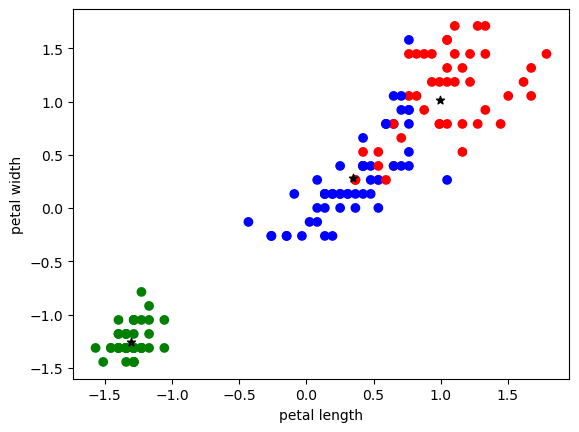

In [ ]:
color1 = np.array(['red','green','blue'])

plt.scatter(x.petal_length, x.petal_width, color=color1[model.labels_])

plt.scatter(j.petal_length,j.petal_width, marker='*',color = 'black')
plt.xlabel('petal length')
plt.ylabel('petal width')